In [1]:
library(ggplot2)
library(reshape2)
library(UpSetR)


Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘reshape2’ was built under R version 3.6.2”


## Panel A- Bar plot showing the significance of GR-etranscripts for enrichment in MDD transcriptional profiles in six brain regions. Both male and female GR-etranscripts were tested against male and female MDD transcriptional profiles. The black line indicates significance cut-off at a p-value of 0.05. 


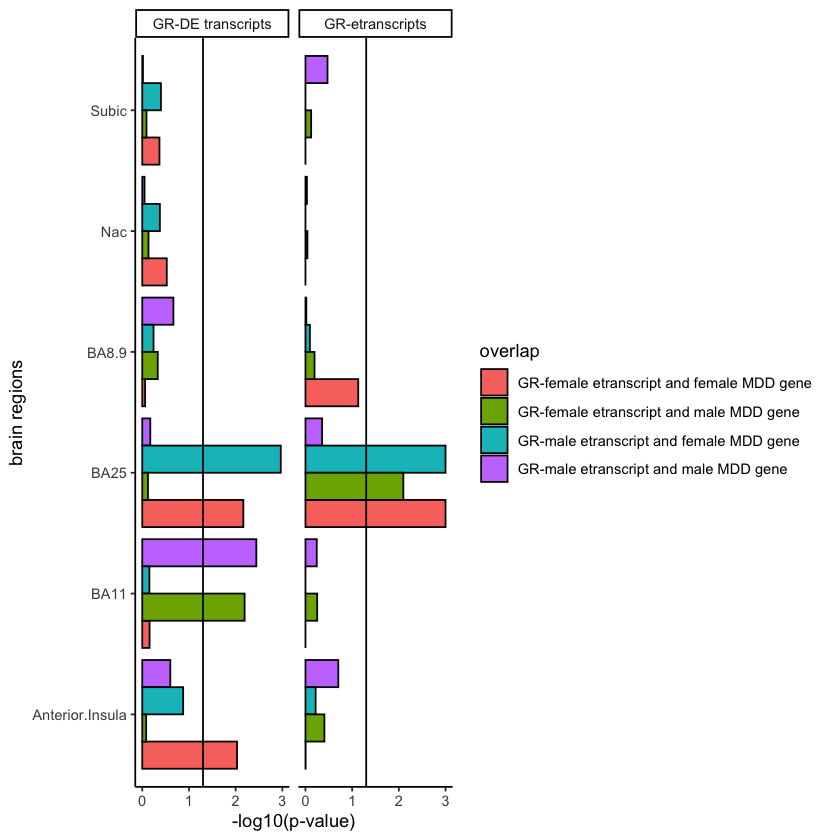

In [2]:
data.genes <-  readRDS("data/fig4A_transcripts_results.rds")
colnames(data.genes)[2]="Anterior.Insula"
data.genes.log <- cbind(data.genes$X,-log10(data.genes[,-1]))
colnames(data.genes.log)[1] <- "varname"
data.genes.log.t <-  t(data.genes.log[,-1] )
colnames(data.genes.log.t) <- data.genes.log$varname
data.genes.log.melt <- melt(t(data.genes.log.t))
data.genes.log.melt$data="GR-DE transcripts"

data.egenes <-  readRDS("data/fig4A_etranscripts_results.rds")
data.egenes.log <- cbind(data.egenes$X,-log10(data.egenes[,-1]))
colnames(data.egenes.log)[1] <- "varname"
data.egenes.log.t <-  t(data.egenes.log[,-1] )
colnames(data.egenes.log.t) <- data.egenes.log$varname
data.egenes.log.melt <- melt(t(data.egenes.log.t))
data.egenes.log.melt$data="GR-etranscripts"

both <- rbind(data.genes.log.melt,data.egenes.log.melt)
both$overlap=""
both[both$Var1=="mGRtranscripts_m"|both$Var1=="mGRetranscripts_m",]$overlap="GR-male etranscript and male MDD gene"
both[both$Var1=="mGRtranscripts_f"|both$Var1=="mGRetranscripts_f",]$overlap="GR-male etranscript and female MDD gene"
both[both$Var1=="fGRtranscripts_f"|both$Var1=="fGRetranscripts_f",]$overlap="GR-female etranscript and female MDD gene"
both[both$Var1=="fGRtranscripts_m"|both$Var1=="fGRetranscripts_m",]$overlap="GR-female etranscript and male MDD gene"
ggplot(both, aes(x = Var2, y=value,fill=overlap)) +
  geom_bar(stat="identity", colour="black", position=position_dodge())+geom_hline(yintercept = -log10(0.05))+
  coord_flip()+theme_classic()+ylab("-log10(p-value)")+xlab("brain regions")+facet_wrap(~data)


## Panel B- Upset plot displaying the overlapping significant sex-stratified GR-response etranscripts with BA25 MDD-related transcripts. 

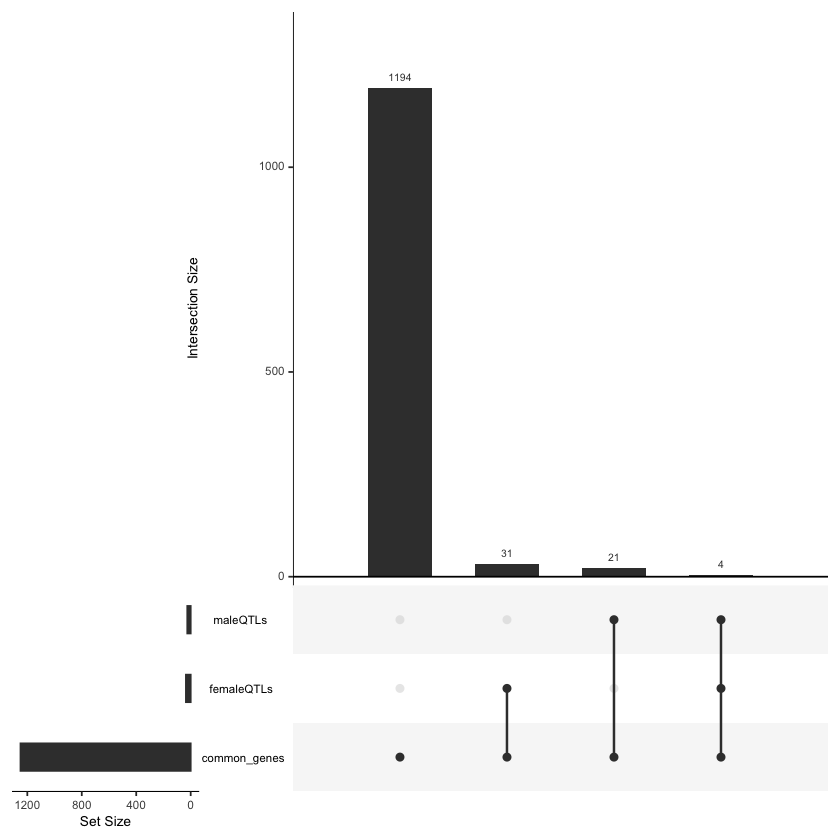

In [3]:
male.eqtl = read.csv("Tables/SupplementaryTable_6_males_GR_2020.csv")
female.eqtl = read.csv("Tables/SupplementaryTable_5_females_GR_2020.csv")
fe_lab <- read.csv(file="data/fig5_female_MDD_labonte.csv")
ba25 <- fe_lab[fe_lab$Brain.Region=="BA25",]

fe25_overlap <- female.eqtl$Gene_symbol[which(female.eqtl$Gene_symbol%in%ba25$Gene.Name)]
ma25_overlap <- male.eqtl$Gene_symbol[which(male.eqtl$Gene_symbol%in%ba25$Gene.Name)]

list_ba25 <- list(common_genes =ba25$Gene.Name, femaleQTLs = fe25_overlap, maleQTLs = ma25_overlap)
upset(fromList(list_ba25), nsets=10)

## Panel C-D - GO enrichment results for etranscripts overlapping with BA25 MDD-related transcripts

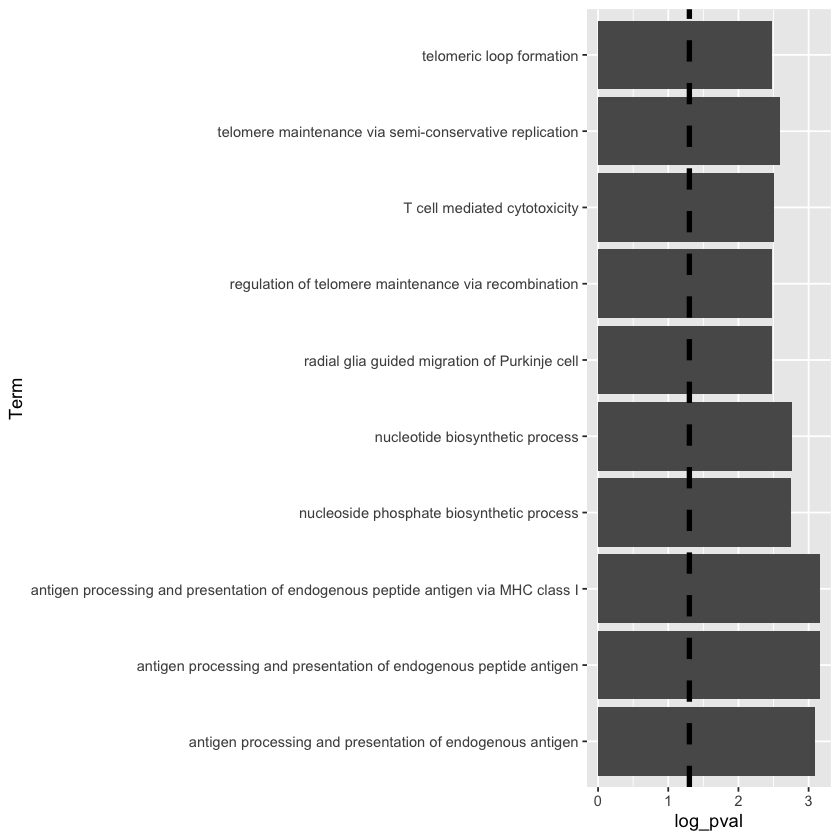

In [6]:
load("data/fig5_male25_go_object_Nov5.RData")
load("data/fig5_female25_go_object.RData")

male25_go=male25_go_nov5
male25_go_plot <- head(male25_go, n = 10)
male25_go_plot <- male25_go_plot[,c(2,7)]
male25_go_plot$log_pval <- log10(male25_go_plot$Pvalue)*-1
ggplot(data=male25_go_plot, aes(x=log_pval, y=Term)) +
  geom_bar(stat="identity")+geom_vline(xintercept = -log10(.05), linetype="dashed", 
                                       color = "black", size=1.5)


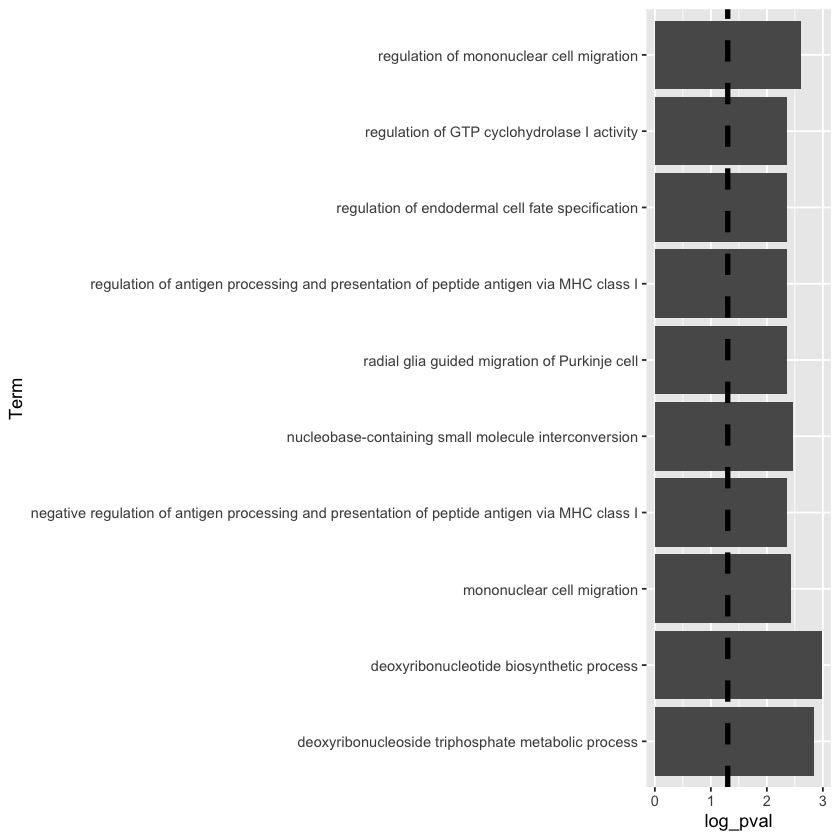

In [9]:
female25_go_plot <- head(female25_go, n = 10)
female25_go_plot <- female25_go_plot[,c(2,7)]
female25_go_plot$log_pval <- log10(female25_go_plot$Pvalue)*-1
ggplot(data=female25_go_plot, aes(x=log_pval, y=Term)) +
  geom_bar(stat="identity")+geom_vline(xintercept = -log10(.05), linetype="dashed", 
                                       color = "black", size=1.5)


## Panel E - DUSP6 example showing gene expression at baseline and post dexamethasone 

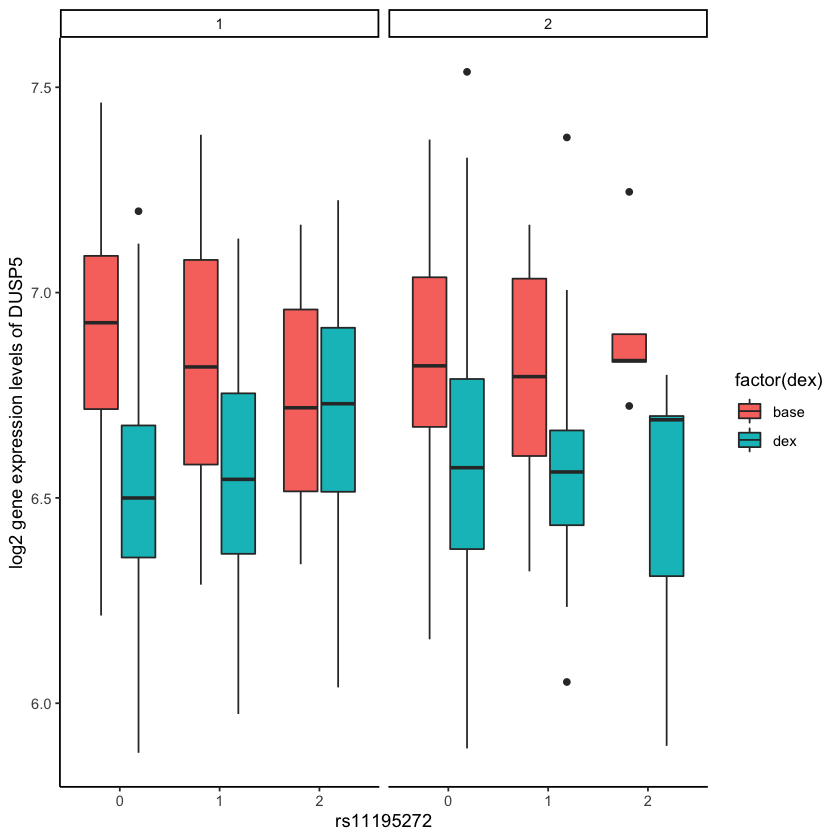

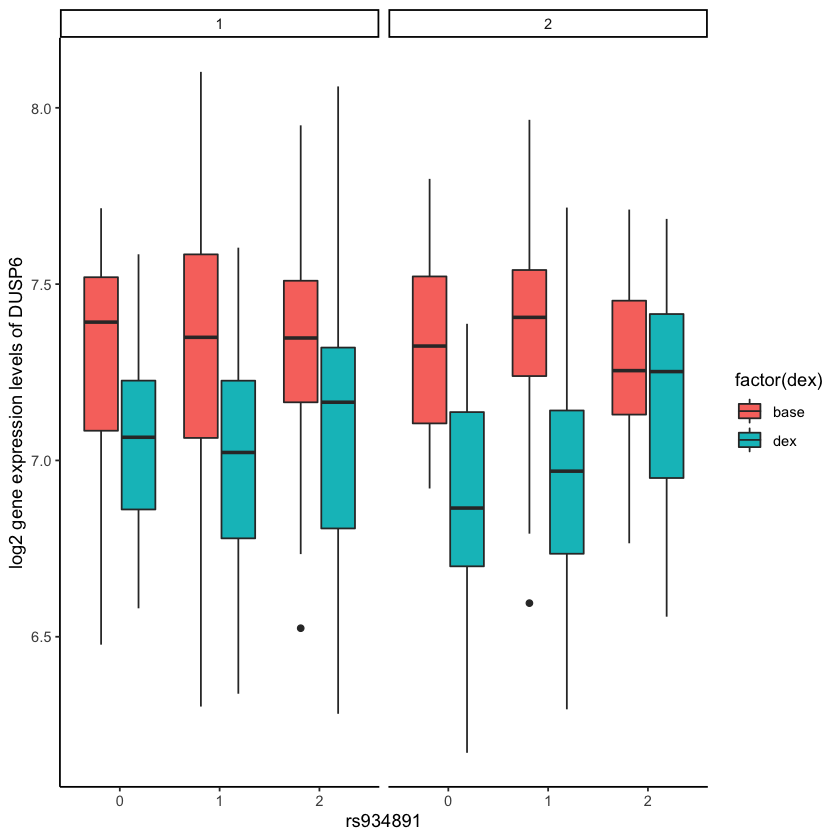

In [10]:
load(file="data/fig5_dusp5_figure.RData")
load(file="data/fig5_dusp6_figure.RData")


ggplot(dusp5_df.f, aes(genotype,vals, fill=factor(dex))) +
  geom_boxplot() + facet_wrap(~ sex)+
  theme_classic()+xlab("rs11195272")+ylab("log2 gene expression levels of DUSP5")


ggplot(dusp6_df.f, aes(genotype,vals, fill=factor(dex))) +
  geom_boxplot() + facet_wrap(~ sex)+
  theme_classic()+xlab("rs934891")+ylab("log2 gene expression levels of DUSP6")
